The following uses the Keras Deep Learning library which provides the abillity to use data augmentation when training a model using the ImageDataGenerator class

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import requests

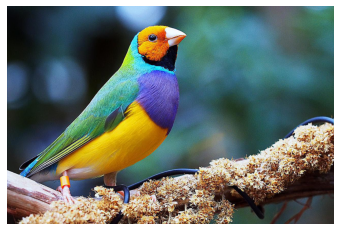

In [6]:
# load image and show it
path = '/content/drive/MyDrive/masters/CSC525/Mod5/CT2/images/img1.jpg'
image = load_img(path)
image = img_to_array(image).astype(int)
data = np.expand_dims(image, 0)
plt.axis('off')
plt.imshow(data[0])


Now, we define a function that initializes and returns an ImageDataGenerator object. The fill_mode is 'nearest' by default but we can set them to a constant black value. 

The fill_mode parameter can be set to 'constant', 'nearest', 'reflect', or 'wrap'. 

In [11]:
def default_datagen(): 
  datagen = ImageDataGenerator(fill_mode = 'constant', dtype = int)
  datagen.fit(data)
  return datagen

In [7]:
def plot_augmentation(datagen, data, n_rows=1, n_cols=5):
  n_images = n_rows * n_cols
  gen_flow = datagen.flow(data)

  plt.figure(figsize=(n_cols * 4, n_rows * 3))
  for image_index in range(n_images):
    image = next(gen_flow)
    plt.subplot(n_rows, n_cols, image_index + 1)
    plt.axis('off')
    plt.imshow(image[0], vmin = 0, vmax = 255)

Now, various transformations can be applied using Keras by initializing the default ImageDataGeneraotr object and setting augmentation parameters. Finally, we can visualize the result.

First, we can visualize width and height shift

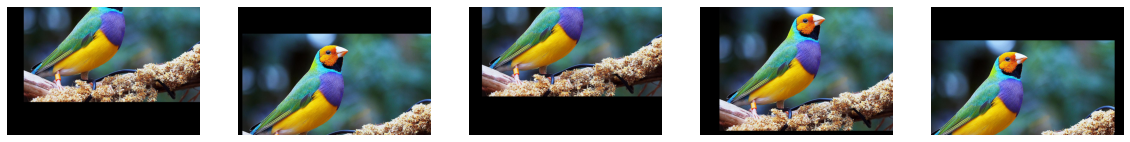

In [12]:
datagen = default_datagen()
datagen.width_shift_range = 0.2
datagen.height_shift_range = 0.2
plot_augmentation(datagen, data)

Furthermore, various other transforms can be applied such as Image Flips.

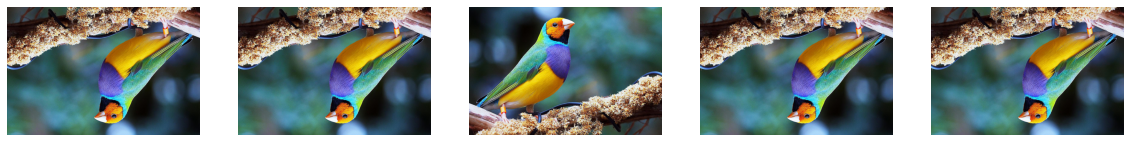

In [13]:
datagen = default_datagen()
datagen.horizontal_flip = True
datagen.vertical_flip = True
plot_augmentation(datagen, data)

Furthermore, we can rotate images for various purposes

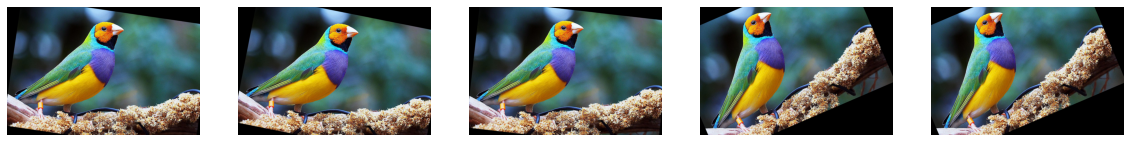

In [14]:
datagen = default_datagen()
datagen.rotation_range = 25
plot_augmentation(datagen, data)

Additionally, images can be zoomed according to a specified range

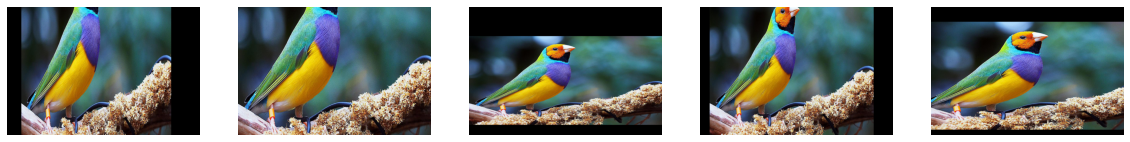

In [15]:
datagen = default_datagen()
datagen.zoom_range = [0.5, 1.5]
plot_augmentation(datagen, data)

Shear is yet another transform to skew images

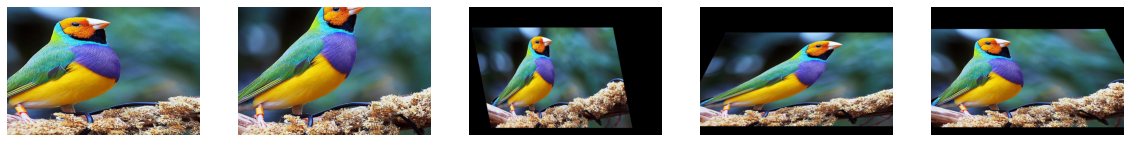

In [16]:
# Shear
dategen = default_datagen()
datagen.shear_range = 20
plot_augmentation(datagen, data)

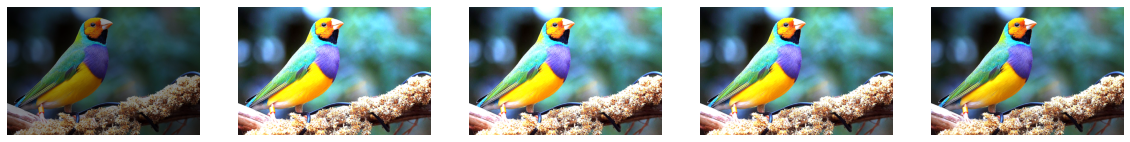

In [17]:
# Brightness
datagen = default_datagen()
datagen.brightness_range = [0.5, 2.0]
plot_augmentation(datagen, data)

Lastly, multiple transforms can be applied simultaneously

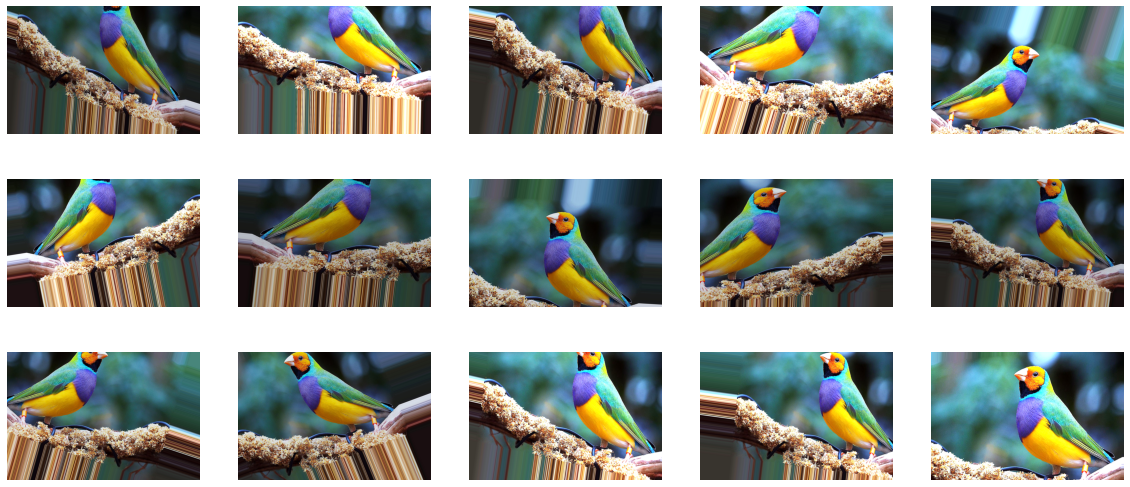

In [18]:
datagen = default_datagen()
datagen.fill_mode='nearest'
datagen.horizontal_flip=True
datagen.width_shift_range=0.2
datagen.height_shift_range=0.2
datagen.zoom_range=[0.8, 1.2]
datagen.rotation_range=20
datagen.shear_range=10
datagen.brightness_range = [0.75, 1.5]
plot_augmentation(datagen, data, n_rows=3, n_cols=5)